# Airline Satisfaction Prediction using Machine Learning and Deep Learning in Python

# ML, DL, Pickle, JobId, Callback, EarlyStopping, ModelCheckpoint

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline    

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#print(os.getcwd())
#os.getcwd()
#print(os.listdir(os.getcwd()))

In [3]:
x=pd.read_csv('Airline.csv')

x.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,...,online_support,ease_of_online_booking,onBoard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   class                              129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   seat_comfort                       129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   food_and_drink                     129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  inflight_wifi_service              1298

In [5]:
print(x.shape)

(129880, 23)


## Check Nulls

In [6]:
x.isnull().sum()[x.isnull().sum()>0]

arrival_delay_in_minutes    393
dtype: int64

In [7]:
x.arrival_delay_in_minutes.fillna(x.arrival_delay_in_minutes.mean(),inplace=True)

In [8]:
x.isnull().sum()[x.isnull().sum()>0]

Series([], dtype: int64)

## EDA

Text(0, 0.5, 'Passengers')

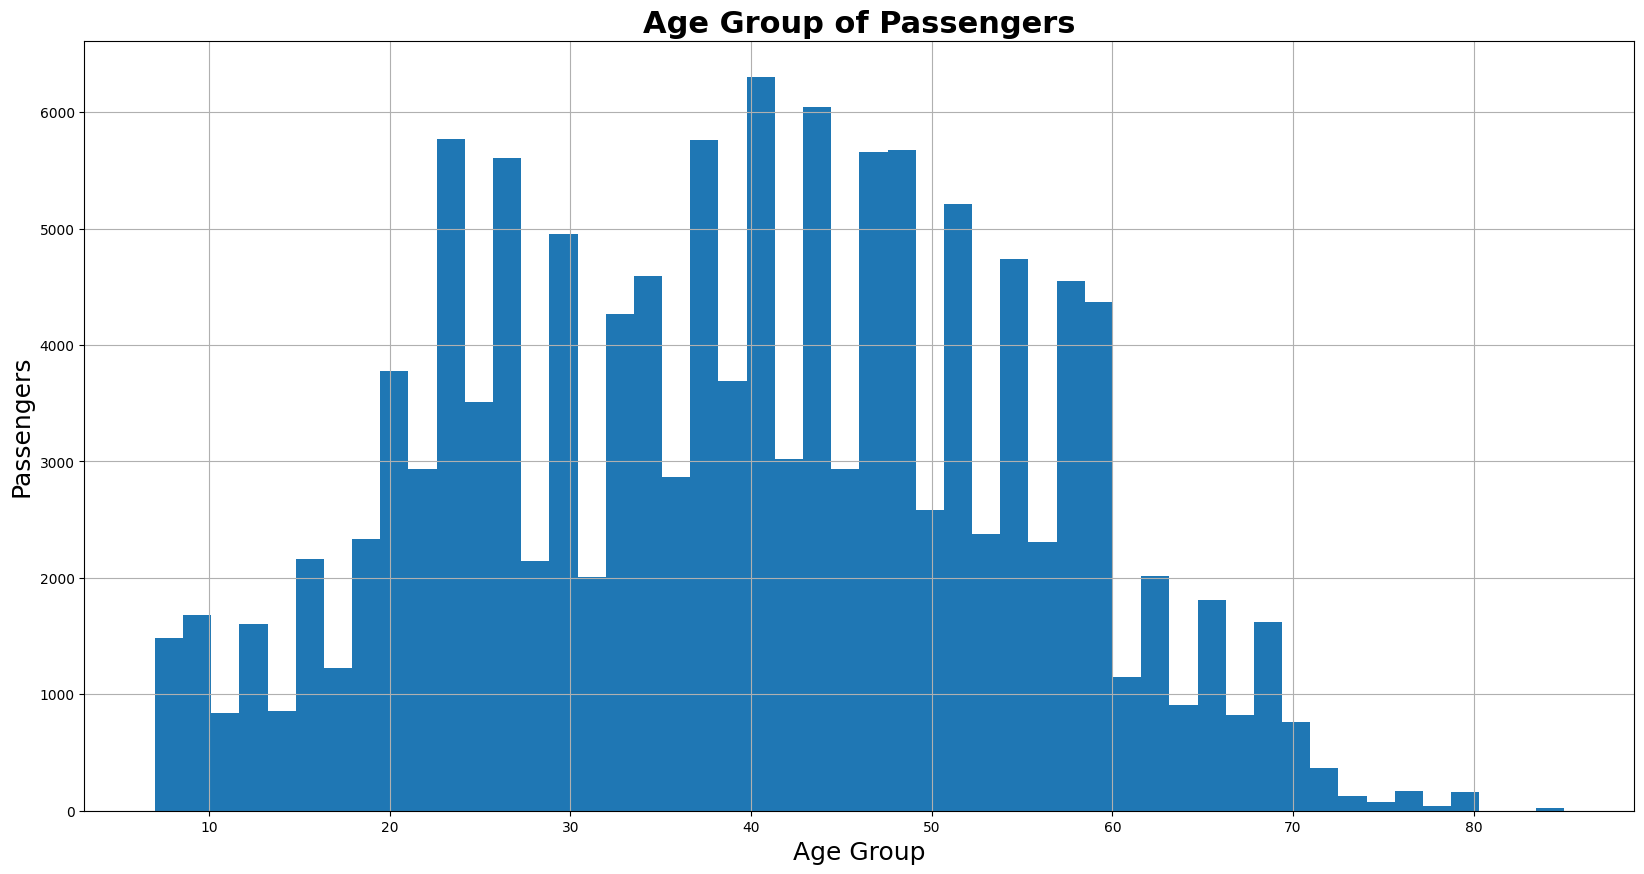

In [9]:
plt.figure(figsize=(20, 10))

x['age'].hist(bins=50)

plt.title("Age Group of Passengers", weight="bold", size="22")
plt.xlabel("Age Group", size="18")
plt.ylabel("Passengers", size="18")

Text(0, 0.5, 'No. of Flights')

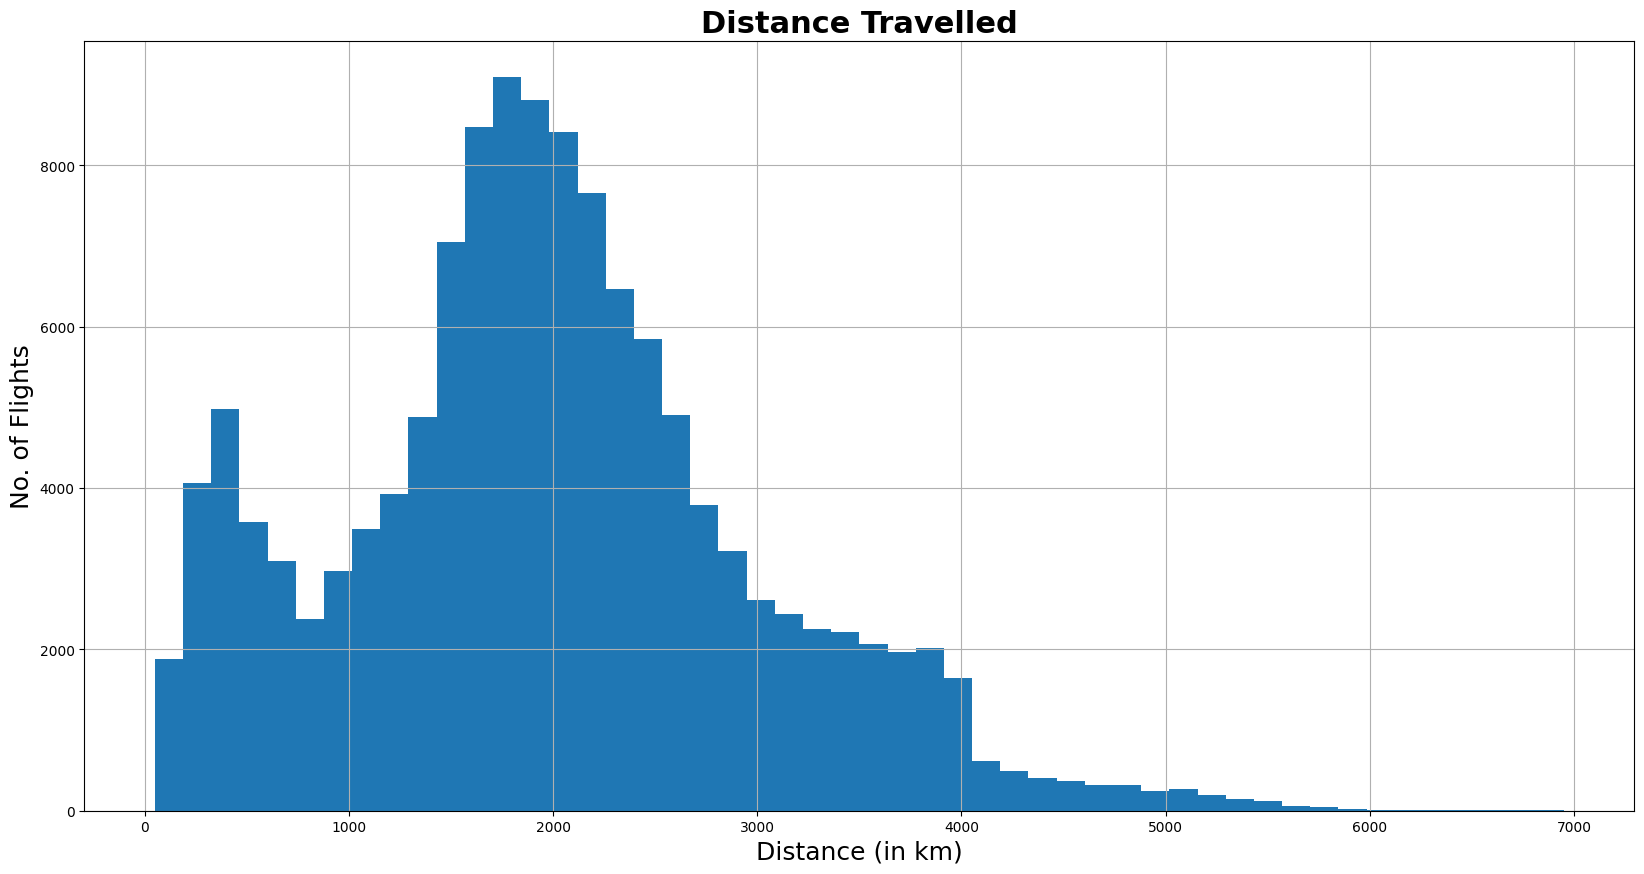

In [10]:
plt.figure(figsize=(20, 10))

x['flight_distance'].hist(bins=50)

plt.title("Distance Travelled", weight="bold", size="22")
plt.xlabel("Distance (in km)", size="18")
plt.ylabel("No. of Flights", size="18")

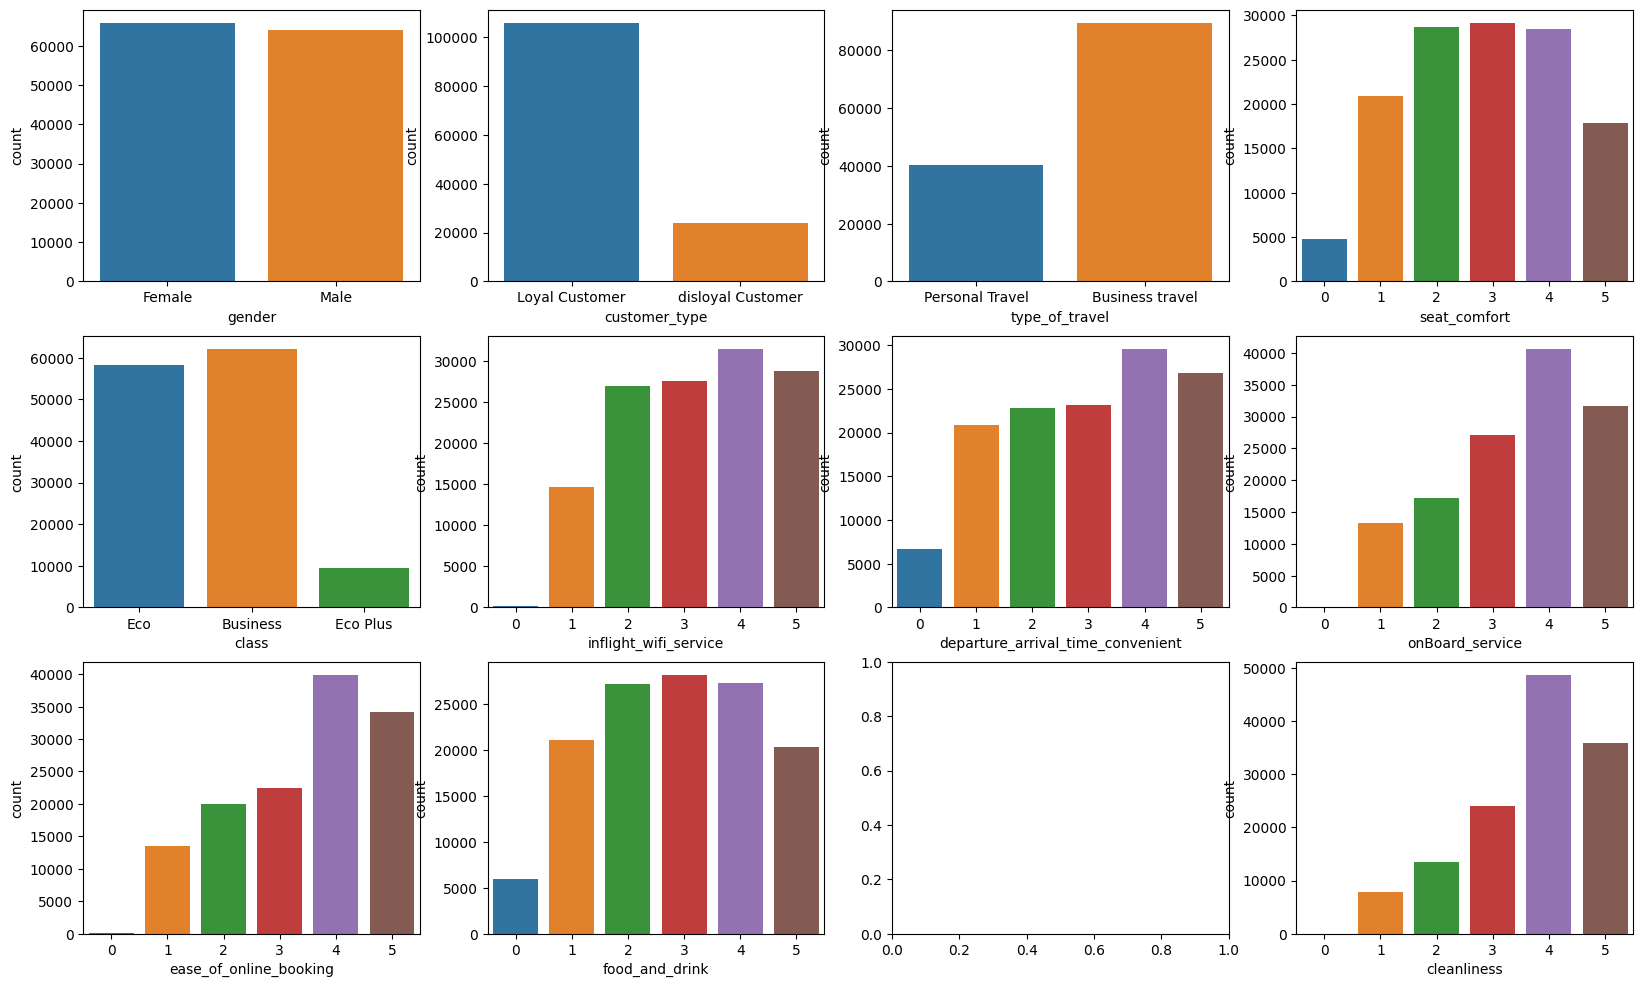

In [11]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'gender', data = x, ax = axes[0, 0]);
sns.countplot(x = 'customer_type', data = x, ax = axes[0, 1]);
sns.countplot(x = 'type_of_travel', data = x, ax = axes[0, 2]);
sns.countplot(x = 'seat_comfort', data = x, ax = axes[0, 3]);
sns.countplot(x = 'class', data = x, ax = axes[1, 0]);
sns.countplot(x = 'inflight_wifi_service', data = x,  ax = axes[1, 1]);
sns.countplot(x = 'departure_arrival_time_convenient', data = x, ax = axes[1, 2]);
sns.countplot(x = 'onBoard_service', data = x, ax = axes[1, 3]);
sns.countplot(x = 'ease_of_online_booking', data = x, ax = axes[2, 0]);
sns.countplot(x = 'food_and_drink', data = x, ax = axes[2, 1]);
#sns.countplot(x = 'Inflight service', data = x, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'cleanliness', data = x, ax = axes[2, 3]);

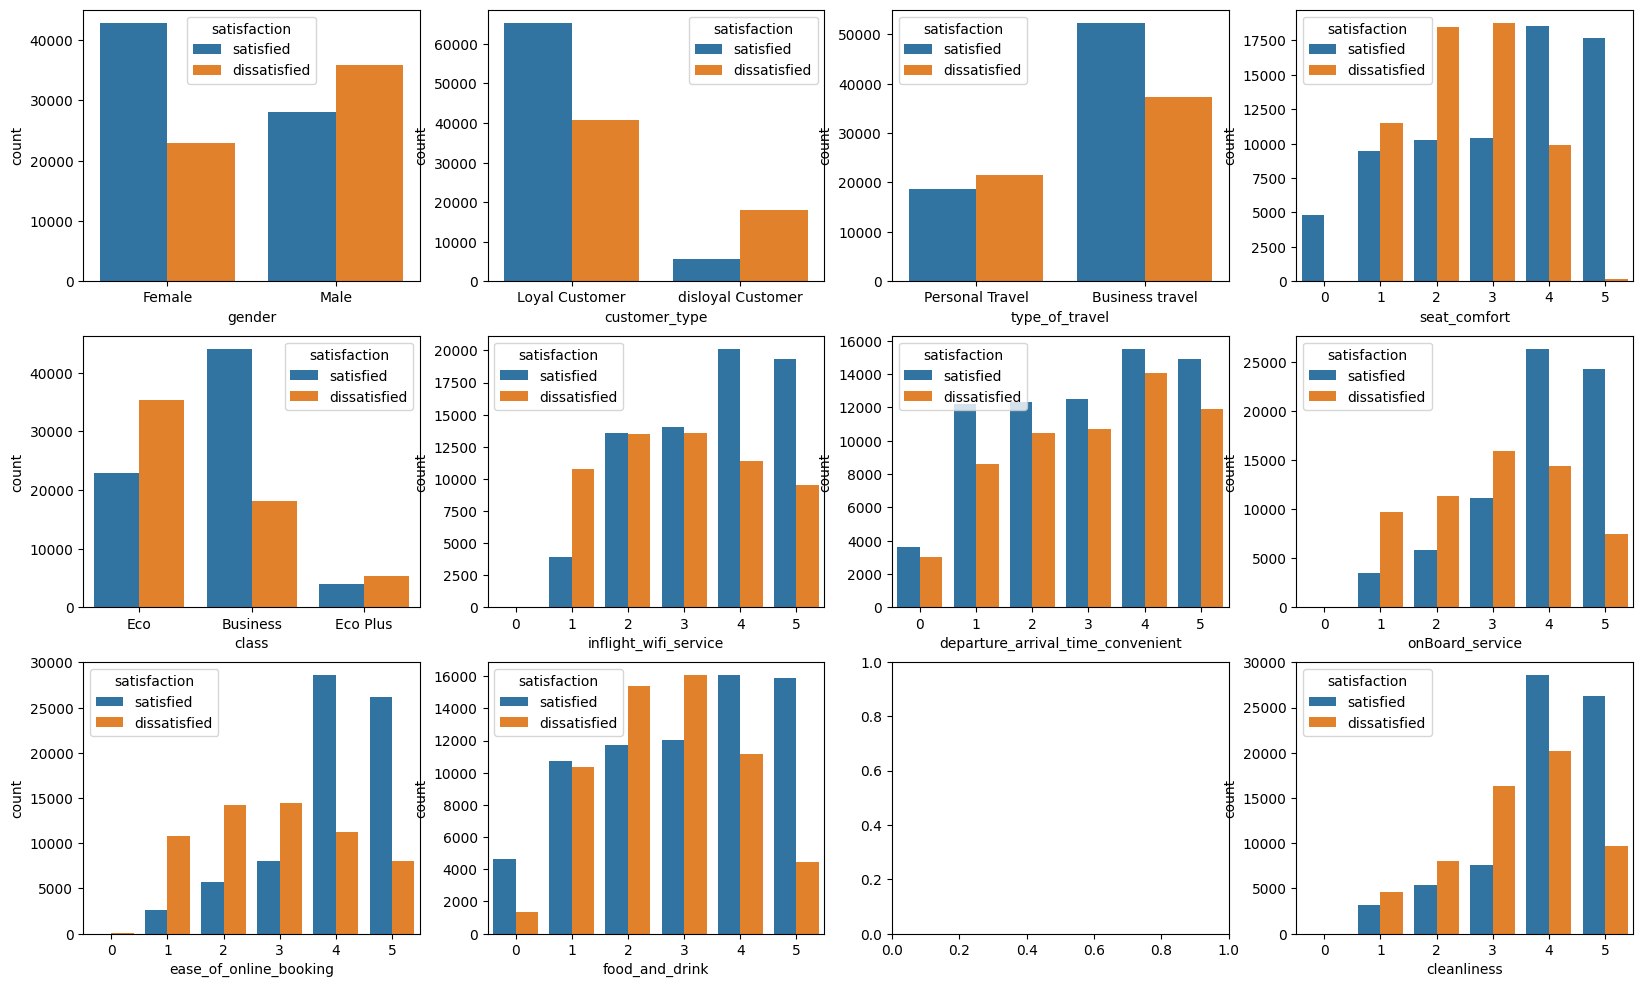

In [12]:
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'gender', data = x, hue='satisfaction', ax = axes[0, 0]);
sns.countplot(x = 'customer_type', data = x, hue='satisfaction',  ax = axes[0, 1]);
sns.countplot(x = 'type_of_travel', data = x, hue='satisfaction', ax = axes[0, 2]);
sns.countplot(x = 'seat_comfort', data = x, hue='satisfaction',  ax = axes[0, 3]);
sns.countplot(x = 'class', data = x, hue='satisfaction', ax = axes[1, 0]);
sns.countplot(x = 'inflight_wifi_service', data = x, hue='satisfaction', ax = axes[1, 1]);
sns.countplot(x = 'departure_arrival_time_convenient', hue='satisfaction', data = x, ax = axes[1, 2]);
sns.countplot(x = 'onBoard_service', data = x, hue='satisfaction', ax = axes[1, 3]);
sns.countplot(x = 'ease_of_online_booking', data = x, hue='satisfaction', ax = axes[2, 0]);
sns.countplot(x = 'food_and_drink', data = x, hue='satisfaction', ax = axes[2, 1]);
sns.countplot(x = 'cleanliness', data = x, hue='satisfaction', ax = axes[2, 3]);
plt.show()

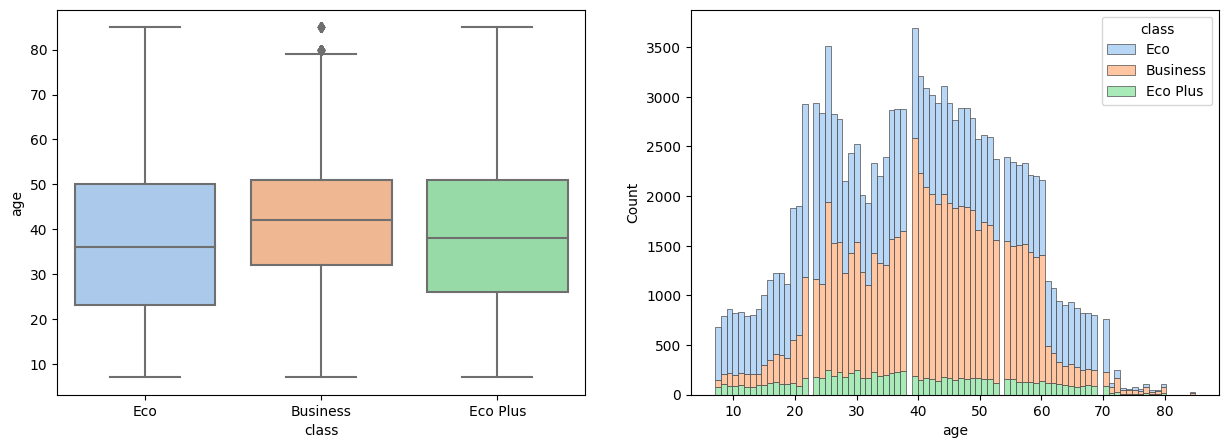

In [13]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "class", y = "age", palette = "pastel", data = x, ax = ax[0])
sns.histplot(x, x = "age", hue = "class", multiple = "stack", palette = "pastel", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

### EDA Takeaways

Customers loyal to the airline they're flying with tend to be more satisfied with their flights, while disloyal ones were more often dissatisfied with their flights.

Business Travel is more popular than personal travel.

Passenger Age has a generally normal distribution.

Ease of online booking correlated with satisfaction.

High scores on cleanliness correlated with greater satisfaction.

Business class customers tended to be more satisfied than Economy class ones.

Business travelers tend to be more satisfied than personal travelers.

Strong in-flight wifi correlates with higher satisfaction.

## Encoding

In [14]:
x=pd.get_dummies(x,drop_first=True)
x.head()

,age,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,...,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction_satisfied,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0.0,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,3,2,310,305.0,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0.0,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0.0,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0.0,1,0,0,1,1,0


## Train, Test, Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_target=x['satisfaction_satisfied']
x_target

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction_satisfied, Length: 129880, dtype: uint8

In [17]:
x_train, x_test, y_train, y_test=train_test_split(x.drop(columns='satisfaction_satisfied'),
                                                  x_target,
                                                  test_size=.30,
                                                  random_state=0)

In [18]:
print(f'x shape is {x_train.shape} \n y shape is {y_train.shape}')
print(f'x test shape is{x_test.shape} \n y test shape is {y_test.shape}')

x shape is (90916, 23) 
 y shape is (90916,)
x test shape is(38964, 23) 
 y test shape is (38964,)


## Machine Learning

### Logistic Regression

In [19]:
print(f'x shape is {x_train.shape} \n y shape is {y_train.shape}')
print(f'x test shape is{x_test.shape} \n y test shape is {y_test.shape}')

x shape is (90916, 23) 
 y shape is (90916,)
x test shape is(38964, 23) 
 y test shape is (38964,)


In [20]:
lr=LogisticRegression(max_iter=10000)

In [21]:
lr.fit(x_train,y_train)  

LogisticRegression(max_iter=10000)

In [22]:
y_hat=lr.predict(x_test)

In [23]:
print(f'Your model accuracy is {accuracy_score(y_test,y_hat)*100}')

Your model accuracy is 83.32820039010369


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(f'Your model accuracy is {confusion_matrix(y_test, y_hat)*100}')

Your model accuracy is [[1428200  330100]
 [ 319500 1818600]]


In [26]:
print(f'Your model accuracy is {classification_report(y_test,y_hat)*100}')

Your model accuracy is               precision    recall  f1-score   support

           0       0.82      0.81      0.81     17583
           1       0.85      0.85      0.85     21381

    accuracy                           0.83     38964
   macro avg       0.83      0.83      0.83     38964
weighted avg       0.83      0.83      0.83     38964
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     17583
           1       0.85      0.85      0.85     21381

    accuracy                           0.83     38964
   macro avg       0.83      0.83      0.83     38964
weighted avg       0.83      0.83      0.83     38964
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     17583
           1       0.85      0.85      0.85     21381

    accuracy                           0.83     38964
   macro avg       0.83      0.83      0.83     38964
weighted avg       0.83      0.83      0.83     38964

### Save by Pickle

In [49]:
import pickle

In [51]:
pickle.dump(lr, open('model.pkl','wb'))

In [52]:
pickled_model= pickle.load(open('model.pkl','rb'))

In [54]:
res=pickled_model.predict(x_test)

In [55]:
res

array([1, 1, 1, ..., 1, 0, 0], dtype=uint8)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,res)*100

83.32820039010369

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()  # n_estimators=100

In [28]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
y_pred=rfc.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.9551637408890258

In [31]:
rfc.feature_importances_

array([0.03075384, 0.0374011 , 0.12560681, 0.02311593, 0.04147682,
       0.01977665, 0.01775441, 0.21005666, 0.05808809, 0.0781036 ,
       0.03909372, 0.04092048, 0.02745048, 0.02841047, 0.024312  ,
       0.0361725 , 0.01480386, 0.01593861, 0.02899002, 0.04358508,
       0.0282849 , 0.02570971, 0.00419425])

In [32]:
df=pd.read_csv('Invistico_Airline.csv')

<Axes: >

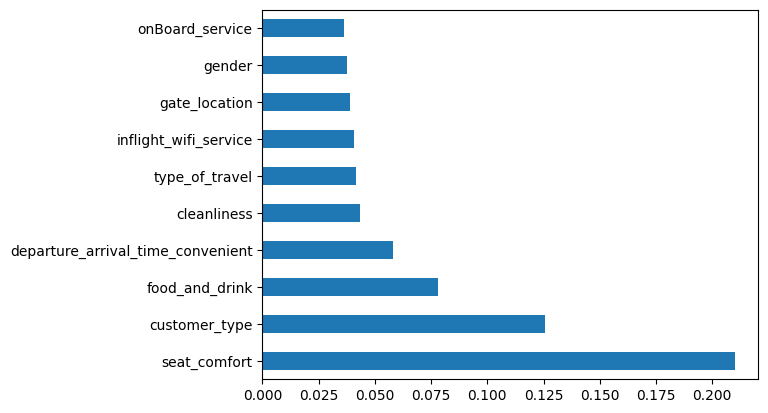

In [33]:
pd.Series(rfc.feature_importances_,index=df.columns).nlargest(10).plot(kind='barh')

### Save by Joblib

In [58]:
from joblib import Parallel, delayed
import joblib

In [59]:
# save model as a pickle in a file

joblib.dump(rfc,'rfc_joblib.pkl')

['rfc_joblib.pkl']

In [61]:
# Load the model from the file
rfc_from_joblib = joblib.load('rfc_joblib.pkl')

r=rfc_from_joblib.predict(x_test)

In [62]:
r

array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [64]:
accuracy_score(y_test,r)*100

95.51637408890258

## Deep Learning

### ANN

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [35]:
print(f'x shape is {x_train.shape} \n y shape is {y_train.shape}')
print(f'x test shape is{x_test.shape} \n y test shape is {y_test.shape}')

x shape is (90916, 23) 
 y shape is (90916,)
x test shape is(38964, 23) 
 y test shape is (38964,)


#### Callback Initiated

In [65]:
# Callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [66]:
model=Sequential()

In [67]:
#Input layer
model.add(layers.Dense(units=23,
                      activation='relu'))
model.add(layers.Dense(units=56,
                      activation='relu'))  #Hidden layer - dense
model.add(layers.Dense(units=112,
                      activation='relu'))
model.add(layers.Dense(units=86,
                      activation='relu'))
model.add(layers.Dense(units=56,
                      activation='relu'))
model.add(layers.Dense(units=48,
                      activation='relu'))

# Output
model.add(layers.Dense(units=1,
                      activation='sigmoid'))

In [68]:
from tensorflow.keras.losses import binary_crossentropy

In [69]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [71]:
history = model.fit(x_train,y_train,validation_split=.1,epochs=1000,callbacks=[callback])

Epoch 1/1000
2557/2557 [==============================] - 3s 1ms/step - loss: 0.6805 - accuracy: 0.6543 - val_loss: 0.4625 - val_accuracy: 0.7696
Epoch 2/1000
2557/2557 [==============================] - 3s 1ms/step - loss: 0.4431 - accuracy: 0.7954 - val_loss: 0.3883 - val_accuracy: 0.8271
Epoch 3/1000
2557/2557 [==============================] - 3s 1ms/step - loss: 0.4192 - accuracy: 0.8115 - val_loss: 0.3943 - val_accuracy: 0.8240
Epoch 4/1000
2557/2557 [==============================] - 3s 1ms/step - loss: 0.4032 - accuracy: 0.8231 - val_loss: 0.4264 - val_accuracy: 0.8129
Epoch 5/1000
2557/2557 [==============================] - 3s 1ms/step - loss: 0.3881 - accuracy: 0.8314 - val_loss: 0.4361 - val_accuracy: 0.8110
Epoch 6/1000
2557/2557 [==============================] - 3s 1ms/step - loss: 0.3789 - accuracy: 0.8349 - val_loss: 0.3642 - val_accuracy: 0.8451
Epoch 7/1000
2557/2557 [==============================] - 3s 1ms/step - loss: 0.3637 - accuracy: 0.8417 - val_loss: 0.3576 -

In [72]:
len(history.history['loss'])

24

In [73]:
print(history.history)

{'loss': [0.6804999709129333, 0.4431442618370056, 0.4192093014717102, 0.40321022272109985, 0.38810431957244873, 0.37887322902679443, 0.36369460821151733, 0.3401959240436554, 0.3223234713077545, 0.31008395552635193, 0.2973928153514862, 0.28625839948654175, 0.2784332036972046, 0.2717666029930115, 0.26495879888534546, 0.26019662618637085, 0.25280922651290894, 0.25629451870918274, 0.2517561912536621, 0.24918203055858612, 0.2437424510717392, 0.29337605834007263, 0.2505919337272644, 0.24667400121688843], 'accuracy': [0.6543312668800354, 0.7953901290893555, 0.8115345239639282, 0.8231081366539001, 0.8313575387001038, 0.8348528742790222, 0.841733455657959, 0.853270411491394, 0.8609821200370789, 0.8651373386383057, 0.8704414367675781, 0.8756355047225952, 0.8784219622612, 0.8817828297615051, 0.8836649656295776, 0.8849359750747681, 0.8887612223625183, 0.8868913650512695, 0.8882479667663574, 0.8898000717163086, 0.8917065858840942, 0.8744011521339417, 0.890166699886322, 0.8918165564537048], 'val_los

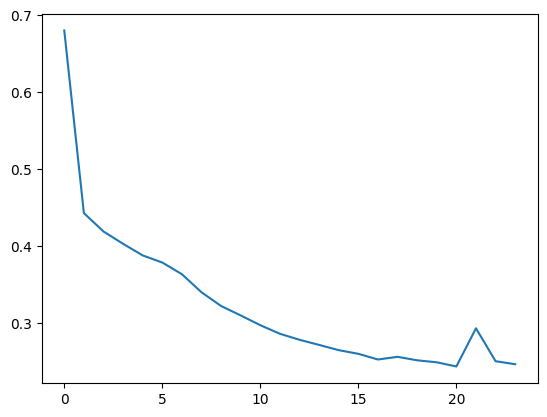

In [74]:
plt.plot(history.history['loss'])

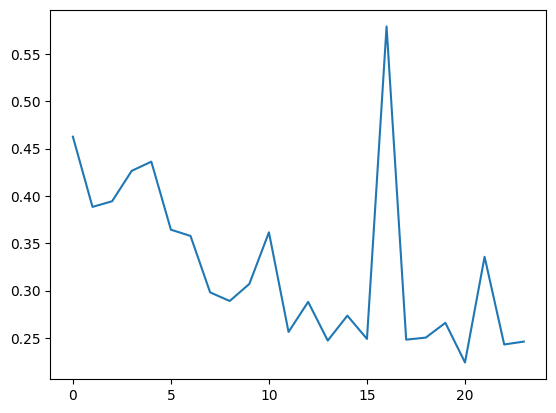

In [75]:
plt.plot(history.history['val_loss'])

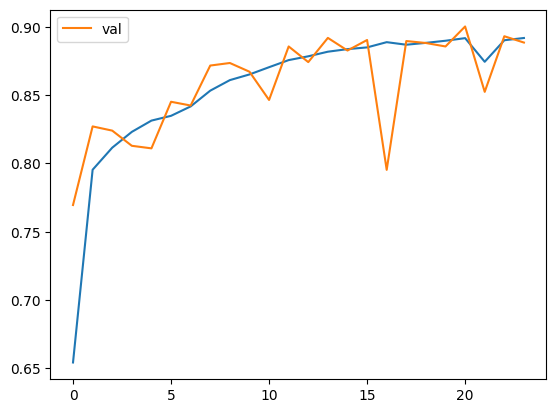

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

# Checkpoint

In [77]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [79]:
filepath = 'checkpoint folder callback'
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [80]:
history = model.fit(x_train,y_train,validation_split=.1,epochs=25,callbacks=[callbacks_list])

Epoch 1/25
2548/2557 [============================>.] - ETA: 0s - loss: 0.2467 - accuracy: 0.8921
Epoch 1: val_accuracy improved from -inf to 0.89683, saving model to checkpoint folder callback


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


2557/2557 [==============================] - 4s 1ms/step - loss: 0.2466 - accuracy: 0.8922 - val_loss: 0.2301 - val_accuracy: 0.8968
Epoch 2/25
2519/2557 [============================>.] - ETA: 0s - loss: 0.2394 - accuracy: 0.8948
Epoch 2: val_accuracy did not improve from 0.89683
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2399 - accuracy: 0.8947 - val_loss: 0.2684 - val_accuracy: 0.8822
Epoch 3/25
2514/2557 [============================>.] - ETA: 0s - loss: 0.2678 - accuracy: 0.8849
Epoch 3: val_accuracy did not improve from 0.89683
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2682 - accuracy: 0.8848 - val_loss: 0.2574 - val_accuracy: 0.8912
Epoch 4/25
2522/2557 [============================>.] - ETA: 0s - loss: 0.2469 - accuracy: 0.8933
Epoch 4: val_accuracy improved from 0.89683 to 0.90310, saving model to checkpoint folder callback


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


2557/2557 [==============================] - 3s 1ms/step - loss: 0.2466 - accuracy: 0.8934 - val_loss: 0.2212 - val_accuracy: 0.9031
Epoch 5/25
2545/2557 [============================>.] - ETA: 0s - loss: 0.3292 - accuracy: 0.8611
Epoch 5: val_accuracy did not improve from 0.90310
2557/2557 [==============================] - 3s 1ms/step - loss: 0.3289 - accuracy: 0.8612 - val_loss: 0.2464 - val_accuracy: 0.8930
Epoch 6/25
2549/2557 [============================>.] - ETA: 0s - loss: 0.2604 - accuracy: 0.8868
Epoch 6: val_accuracy did not improve from 0.90310
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2603 - accuracy: 0.8868 - val_loss: 0.2482 - val_accuracy: 0.8939
Epoch 7/25
2538/2557 [============================>.] - ETA: 0s - loss: 0.2515 - accuracy: 0.8904
Epoch 7: val_accuracy did not improve from 0.90310
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2512 - accuracy: 0.8905 - val_loss: 0.2368 - val_accuracy: 0.8955
Epoch 8/25
2534/2557 

INFO:tensorflow:Assets written to: checkpoint folder callback\assets


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


2557/2557 [==============================] - 3s 1ms/step - loss: 0.2465 - accuracy: 0.8915 - val_loss: 0.2232 - val_accuracy: 0.9032
Epoch 9/25
2541/2557 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.8953
Epoch 9: val_accuracy did not improve from 0.90321
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2417 - accuracy: 0.8952 - val_loss: 0.2465 - val_accuracy: 0.8881
Epoch 10/25
2544/2557 [============================>.] - ETA: 0s - loss: 0.2384 - accuracy: 0.8960
Epoch 10: val_accuracy did not improve from 0.90321
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2385 - accuracy: 0.8960 - val_loss: 0.2227 - val_accuracy: 0.9030
Epoch 11/25
2513/2557 [============================>.] - ETA: 0s - loss: 0.2356 - accuracy: 0.8992
Epoch 11: val_accuracy improved from 0.90321 to 0.90761, saving model to checkpoint folder callback


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


2557/2557 [==============================] - 3s 1ms/step - loss: 0.2354 - accuracy: 0.8992 - val_loss: 0.2164 - val_accuracy: 0.9076
Epoch 12/25
2516/2557 [============================>.] - ETA: 0s - loss: 0.2335 - accuracy: 0.8983
Epoch 12: val_accuracy did not improve from 0.90761
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2334 - accuracy: 0.8984 - val_loss: 0.2532 - val_accuracy: 0.8875
Epoch 13/25
2521/2557 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.9002
Epoch 13: val_accuracy did not improve from 0.90761
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2287 - accuracy: 0.9003 - val_loss: 0.2589 - val_accuracy: 0.8865
Epoch 14/25
2516/2557 [============================>.] - ETA: 0s - loss: 0.2336 - accuracy: 0.8983
Epoch 14: val_accuracy did not improve from 0.90761
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2333 - accuracy: 0.8985 - val_loss: 0.2429 - val_accuracy: 0.8936
Epoch 15/25
255

INFO:tensorflow:Assets written to: checkpoint folder callback\assets


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


2557/2557 [==============================] - 3s 1ms/step - loss: 0.2216 - accuracy: 0.9039 - val_loss: 0.2043 - val_accuracy: 0.9117
Epoch 20/25
2514/2557 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9045
Epoch 20: val_accuracy improved from 0.91168 to 0.91179, saving model to checkpoint folder callback


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


2557/2557 [==============================] - 3s 1ms/step - loss: 0.2176 - accuracy: 0.9048 - val_loss: 0.2040 - val_accuracy: 0.9118
Epoch 21/25
2539/2557 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.9038
Epoch 21: val_accuracy did not improve from 0.91179
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2195 - accuracy: 0.9038 - val_loss: 0.2095 - val_accuracy: 0.9067
Epoch 22/25
2549/2557 [============================>.] - ETA: 0s - loss: 0.2155 - accuracy: 0.9060
Epoch 22: val_accuracy did not improve from 0.91179
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2155 - accuracy: 0.9060 - val_loss: 0.2110 - val_accuracy: 0.9071
Epoch 23/25
2515/2557 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9104
Epoch 23: val_accuracy improved from 0.91179 to 0.92004, saving model to checkpoint folder callback


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


INFO:tensorflow:Assets written to: checkpoint folder callback\assets


2557/2557 [==============================] - 3s 1ms/step - loss: 0.2055 - accuracy: 0.9106 - val_loss: 0.1877 - val_accuracy: 0.9200
Epoch 24/25
2528/2557 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.8958
Epoch 24: val_accuracy did not improve from 0.92004
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2422 - accuracy: 0.8958 - val_loss: 0.2167 - val_accuracy: 0.9064
Epoch 25/25
2524/2557 [============================>.] - ETA: 0s - loss: 0.2102 - accuracy: 0.9073
Epoch 25: val_accuracy did not improve from 0.92004
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2102 - accuracy: 0.9072 - val_loss: 0.2281 - val_accuracy: 0.9012


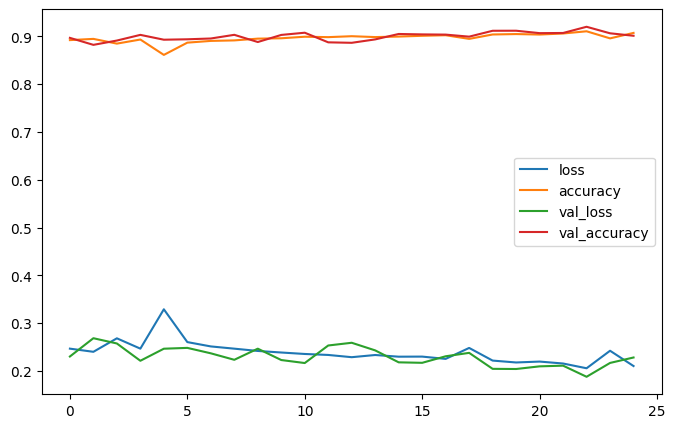

In [81]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [82]:
model.load_weights(filepath)

In [86]:
"""
#defining validation here
model.fit(x_train,y_train,batch_size=32,epochs=20)
"""

'\n#defining validation here\nmodel.fit(x_train,y_train,batch_size=32,epochs=20)\n'

In [87]:
model.evaluate(x_test,y_test)

1218/1218 [==============================] - 1s 703us/step - loss: 0.1963 - accuracy: 0.9139


[0.19630540907382965, 0.9139462113380432]

In [88]:
y_hat=model.predict(x_test)

1218/1218 [==============================] - 1s 654us/step


In [89]:
y_test

125669    1
90648     1
45322     0
64084     1
71595     0
         ..
7500      0
48924     0
32666     0
23473     0
25789     0
Name: satisfaction_satisfied, Length: 38964, dtype: uint8

In [44]:
y_hat

array([[0.9855072 ],
       [0.95585984],
       [0.17725672],
       ...,
       [0.46405223],
       [0.1030412 ],
       [0.15194319]], dtype=float32)

In [45]:
y_hat=y_hat.round()

In [46]:
print(f'Your model accuracy is {accuracy_score(y_test,y_hat)*100}')

Your model accuracy is 89.664818807104


In [47]:
print(f'Your model accuracy is \n {confusion_matrix(y_test,y_hat)}')

Your model accuracy is 
 [[15812  1771]
 [ 2256 19125]]


In [48]:
print(f'Your model accuracy is \n {classification_report(y_test,y_hat)}')

Your model accuracy is 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     17583
           1       0.92      0.89      0.90     21381

    accuracy                           0.90     38964
   macro avg       0.90      0.90      0.90     38964
weighted avg       0.90      0.90      0.90     38964

